# Sesion 3

In [34]:
#Distribucion Discretas

from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import nbinom
from scipy.stats import poisson

#Distribucion continua 
#from scipy.stats import norm
from scipy.stats import expon
from scipy.stats import uniform
#Distribuciones muestrales
#from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2
from scipy.stats import f


from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import Image


import statsmodels.api as sm
import pyreadstat as pr



In [73]:
%matplotlib inline

In [74]:
universe = ['Cara','Sello']
p_cara = 1/2
display(p_cara, universe)

0.5

['Cara', 'Sello']

#### Funcion de bernuli

In [75]:
print(universe[bernoulli.rvs(p=p_cara)])
print(bernoulli.rvs(p=p_cara, size = 10))
sum(bernoulli.rvs(p=p_cara, size = 10))

Sello
[0 1 1 0 0 0 0 1 1 0]


4

#### Funcion binomial

In [76]:
binom.rvs(p=p_cara, n = 10, size = 100)

array([5, 8, 2, 5, 5, 3, 5, 4, 3, 5, 4, 5, 2, 4, 6, 6, 2, 2, 6, 4, 3, 3,
       8, 5, 3, 4, 5, 4, 6, 5, 3, 5, 5, 1, 7, 5, 5, 2, 5, 6, 5, 6, 6, 6,
       6, 7, 5, 2, 4, 3, 2, 3, 3, 4, 4, 5, 2, 7, 7, 7, 6, 7, 4, 4, 6, 5,
       6, 5, 8, 5, 4, 7, 4, 6, 5, 6, 4, 4, 7, 4, 3, 4, 6, 7, 5, 2, 4, 2,
       3, 4, 5, 5, 3, 2, 5, 3, 6, 4, 5, 6])

In [77]:
pd.Series(binom.rvs(p=p_cara, n= 10, size = 100)).value_counts()/100

4    0.22
5    0.20
6    0.16
7    0.15
3    0.15
2    0.05
8    0.03
1    0.03
9    0.01
dtype: float64

# Sesion 4

In [78]:
dataBase = pd.read_csv('bicicletas-compartidas.csv')
display(dataBase.head(n=3),dataBase.ndim,dataBase.shape,dataBase.columns,dataBase.index)

,fecha,bicis-compartidas,temp-obs,sens-temp,hum,viento,codigo-clima,festivo,findesemana,cuartil-ano
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0


2

(17414, 10)

Index(['fecha', 'bicis-compartidas', 'temp-obs', 'sens-temp', 'hum', 'viento',
       'codigo-clima', 'festivo', 'findesemana', 'cuartil-ano'],
      dtype='object')

RangeIndex(start=0, stop=17414, step=1)

In [79]:
y = dataBase['bicis-compartidas'].values
y

array([182, 138, 134, ..., 337, 224, 139], dtype=int64)

In [80]:
# Deacuerdo a la profe se tiene que remplazar por 1
y = np.where(y == 0, 1, y)
y

array([182, 138, 134, ..., 337, 224, 139], dtype=int64)

In [81]:
display(np.min(y), np.max(y))

1

7860

In [82]:
#considero que festivo y findesemana deberian ser booleanas 
dataBase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
fecha                17414 non-null object
bicis-compartidas    17414 non-null int64
temp-obs             17414 non-null float64
sens-temp            17414 non-null float64
hum                  17414 non-null float64
viento               17414 non-null float64
codigo-clima         17414 non-null float64
festivo              17414 non-null float64
findesemana          17414 non-null float64
cuartil-ano          17414 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [83]:
dataBase.describe(include = 'all')

,fecha,bicis-compartidas,temp-obs,sens-temp,hum,viento,codigo-clima,festivo,findesemana,cuartil-ano
count,17414,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
unique,17414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-12-16 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,NaN,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,NaN,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,NaN,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,NaN,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,NaN,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000


#### Medidas de tendencia central

In [84]:
#Media aritmetica
np.mean(y)

1143.1016997817849

In [85]:
#Media geometrica
scipy.stats.mstats.hmean(y)

241.65180305136826

In [86]:
#Mediana
np.median(y)

844.0

In [87]:
#Moda
moda = np.nan
values, count_value = np.unique(y, return_counts = True)
pos = np.argmax(count_value)
moda = values[pos]
moda

46

#### Medidas de dispersion

In [88]:
#Desviacion
np.std(y)

1085.0768508213835

In [89]:
y_alterado = y
y_alterado[y_alterado == max(y_alterado)] = 100000

In [90]:
display(np.mean(y_alterado), np.median(y_alterado), scipy.stats.mstats.hmean(y_alterado), np.std(y_alterado))

1148.392844837487

844.0

241.65219615577115

1317.5621609117995

# Sesion 5

#### Frecuencias categoricas

In [91]:
ycat = dataBase['cuartil-ano']
#Transformar un y categorico
ycat = ycat.apply(lambda x: 'Cat -' + str(int(x)))
ycat.head()

0    Cat -3
1    Cat -3
2    Cat -3
3    Cat -3
4    Cat -3
Name: cuartil-ano, dtype: object

#### Diagramas de frecuencias

In [92]:
valores, conteo_freq = np.unique(ycat, return_counts = True)
valores, conteo_freq

(array(['Cat -0', 'Cat -1', 'Cat -2', 'Cat -3'], dtype=object),
 array([4394, 4387, 4303, 4330], dtype=int64))

In [93]:
# Declarar una tabla 
tabla = dict(zip(valores, conteo_freq))
tabla

{'Cat -0': 4394, 'Cat -1': 4387, 'Cat -2': 4303, 'Cat -3': 4330}

In [94]:
#Variable numerica
ynum = dataBase['viento'].copy()
ynum.tail()

17409    19.0
17410    21.0
17411    24.0
17412    23.0
17413    22.0
Name: viento, dtype: float64

#### Calculo de percentiles

In [95]:
np.min(ynum), np.max(ynum)

(0.0, 56.5)

In [96]:
np.percentile(ynum, q=100)

56.5

In [97]:
np.percentile(ynum, q=0)

0.0

In [98]:
np.percentile(ynum, q=50)

15.0

#### Calculo de cuartiles

In [99]:
valores = [0,25,50,75,100]
np.percentile(ynum, q = valores)

array([ 0. , 10. , 15. , 20.5, 56.5])

#### Calculo de quintiles

In [100]:
valores = [0,20,40,60,80,100]
np.percentile(ynum, q=valores)

array([ 0. ,  9. , 13. , 17. , 22. , 56.5])

#### Calculo de deciles

In [101]:
valores = list(range(0,110,10))
np.percentile(ynum, q=valores)

array([ 0. ,  6.5,  9. , 11. , 13. , 15. , 17. , 19.5, 22. , 27. , 56.5])

In [102]:
y = dataBase['bicis-compartidas']
y.describe()

count    17414.000000
mean      1143.101642
std       1085.108068
min          0.000000
25%        257.000000
50%        844.000000
75%       1671.750000
max       7860.000000
Name: bicis-compartidas, dtype: float64

#### Valores atipicos

In [103]:
q1 =  np.percentile(ynum, q=25)
q3 = np.percentile(ynum, 75)
rango_intercuartilico = q3 - q1
lim_inf = q1 - 1.5*rango_intercuartilico
lim_sup = q3 - 1.5*rango_intercuartilico
[lim_inf, lim_sup]

[-5.75, 4.75]

(array([8.274e+03, 4.416e+03, 2.355e+03, 1.241e+03, 5.610e+02, 4.710e+02,
        8.800e+01, 2.000e+00, 3.000e+00, 3.000e+00]),
 array([   0.,  786., 1572., 2358., 3144., 3930., 4716., 5502., 6288.,
        7074., 7860.]),
 <a list of 10 Patch objects>)

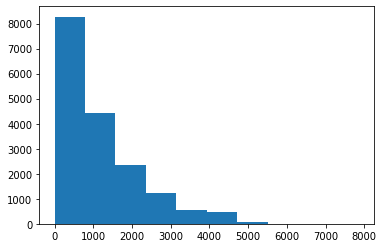

In [104]:
plt.hist(y)

# Sesión 6

### Categoricas

#### Diagrama de barras

In [105]:
y = dataBase['cuartil-ano'].apply(lambda x: 'cuartil-' + str(int(x)))
y.describe()

count         17414
unique            4
top       cuartil-0
freq           4394
Name: cuartil-ano, dtype: object

Text(0, 0.5, 'Frecuencia')

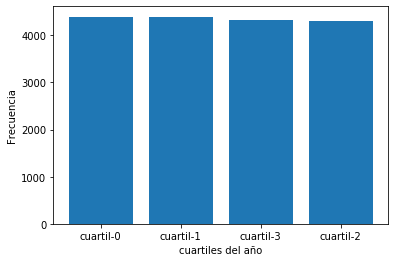

In [106]:
fig, ax = plt.subplots()
ax.bar(y.value_counts().index, y.value_counts())
ax.set_xlabel('cuartiles del año')
ax.set_ylabel('Frecuencia')

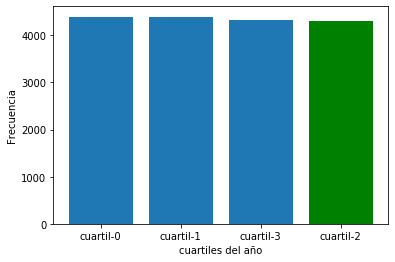

In [107]:
fig, ax = plt.subplots()
ax.bar(y.value_counts().index, y.value_counts())
ax.set_xlabel('cuartiles del año')
ax.set_ylabel('Frecuencia')
ax.patches[3].set_facecolor('g')

#### Diagrama de torta

Text(0.5, 1.0, 'Diagrama de pie')

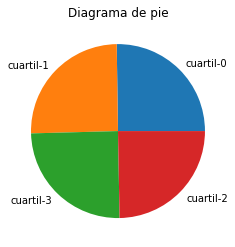

In [108]:
fig, ax = plt.subplots()
ax.pie(y.value_counts(), labels = y.value_counts().index )
ax.set_title('Diagrama de pie')

### Numericas

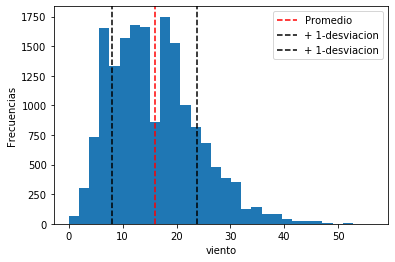

In [109]:
y = dataBase['viento']
fig, ax = plt.subplots()
ax.hist(y, bins = 30)
ax.set_xlabel('viento')
ax.set_ylabel('Frecuencias')
plt.axvline(np.mean(y), c='r', linestyle = '--', label = 'Promedio')
plt.axvline(np.mean(y) + np.std(y), c='k', linestyle = '--', label = '+ 1-desviacion')
plt.axvline(np.mean(y) - np.std(y), c='k', linestyle = '--', label = '+ 1-desviacion')
ax.legend()

# Sesion 7

{'whiskers': [<matplotlib.lines.Line2D at 0x19d9907bdd8>,
 'caps': [<matplotlib.lines.Line2D at 0x19d990887b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x19d9907bc88>],
 'medians': [<matplotlib.lines.Line2D at 0x19d99088e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x19d99088f28>],
 'means': []}

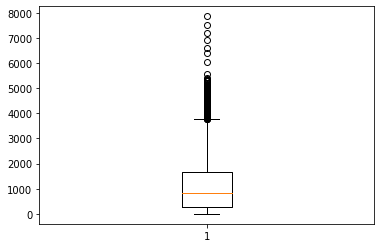

In [110]:
y = dataBase['bicis-compartidas']
fig, ax = plt.subplots()
ax.boxplot(x = y)

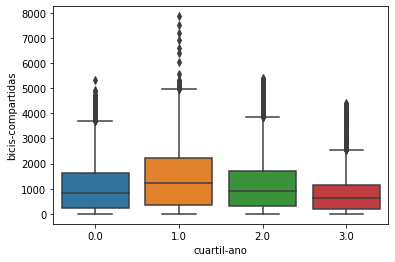

In [111]:
y = dataBase['bicis-compartidas']
fig, ax = plt.subplots()
sns.boxplot(x = 'cuartil-ano', y = 'bicis-compartidas', data = dataBase)

Text(0, 0.5, 'Bicis-Compartidas')

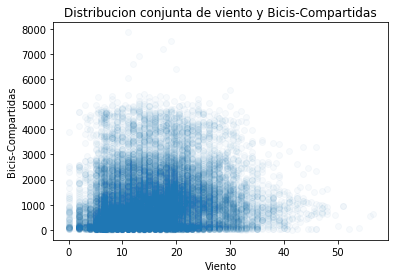

In [112]:
fig, ax = plt.subplots()
ax.scatter(dataBase['viento'], dataBase['bicis-compartidas'], alpha = 0.03)
ax.set_title('Distribucion conjunta de viento y Bicis-Compartidas')
ax.set_xlabel('Viento')
ax.set_ylabel('Bicis-Compartidas')

# Sesion 8

#### Probabilidad condicional - Teorema de Bayes

In [113]:
game = pd.read_csv('juego-azar.csv',sep=';')
game

,bola,color,numero
0,1,blanco,1
1,2,negro,1
2,3,negro,1
3,4,negro,1
4,5,blanco,2
5,6,negro,2
6,7,negro,2
7,8,blanco,3
8,9,blanco,3
9,10,negro,3


In [114]:
game.numero.value_counts()/len(game)

1    0.4
3    0.3
2    0.3
Name: numero, dtype: float64

In [115]:
game.color.value_counts()/len(game)

negro     0.6
blanco    0.4
Name: color, dtype: float64

In [116]:
game.groupby(['color','numero']).size()

color   numero
blanco  1         1
        2         1
        3         2
negro   1         3
        2         2
        3         1
dtype: int64

In [117]:
game.groupby(['numero','color']).size()/len(game)

numero  color 
1       blanco    0.1
        negro     0.3
2       blanco    0.1
        negro     0.2
3       blanco    0.2
        negro     0.1
dtype: float64

In [118]:
#PC(A|B) =P(B|2) = 1/3
1/3

0.3333333333333333

In [119]:
#P(A)
#P(A|B)
#P(B)
#p_blanca = 4/10
#P(p_blanca) + P(p_blanca|2) + P(p_blanca|3)
#1 + 1 + 2
#p(blanco) = P(p_blanca |1) * P(1) + P(p_blanca|2) * P(2) + P(p_blanca|3) * P(3)
(1/4) * (4/10) + (1/3)*(3/10) + (2/3)*(3/10)



0.4

# Sesion 9
# Funciones de distribución discreta y continua

#### Distribucion de probabilidad discretas

In [120]:
#Parametros poblacionales
p = 0.3
# Numero de intentos de exitos
n = 8
x =  list(range(0,9,1))
y = list([])

In [121]:
for i in x:
    y.append(binom.pmf(i, p = p, n=n))
    
y

[0.05764800999999999,
 0.19765032000000002,
 0.29647548,
 0.25412183999999993,
 0.13613669999999997,
 0.04667543999999999,
 0.010001879999999989,
 0.0012247199999999988,
 6.560999999999994e-05]

Text(0, 0.5, 'Probabilidad discretas')

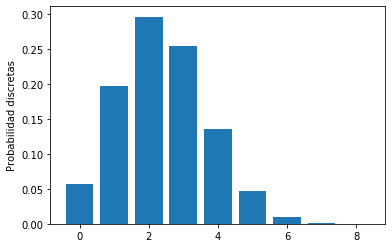

In [122]:
fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_ylabel('Probabilidad discretas')

In [123]:
np.sum(y)

1.0

In [124]:
#Promedio ponderado
media = np.average(x, weights = y)
varianza = np.average(((x - media) **2), weights = y)
media, varianza

(2.3999999999999995, 1.6799999999999997)

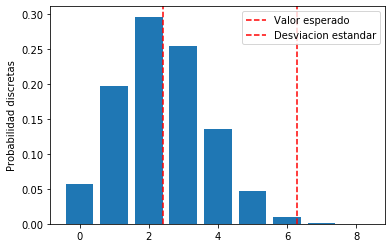

In [125]:
fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_ylabel('Probabilidad discretas')
ax.axvline(x=media, c= 'r', linestyle = "--", label ='Valor esperado')
ax.axvline(x=media + 3*np.sqrt(varianza), c= 'r', linestyle = "--",label ='Desviacion estandar')
ax.legend()

# Sesion 10
# Funciones de distribución discreta y continua

Text(0.5, 1.0, 'Probabilidad continua')

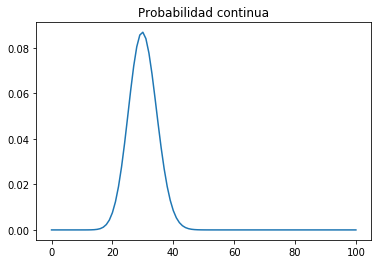

In [126]:
N = 100
x = list(range(0,N+1,1))
y = list([])

for i in x:
    y.append(binom.pmf(i, p = 0.3, n= N))
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Probabilidad continua')

Text(0.5, 1.0, 'Probabilidad continua')

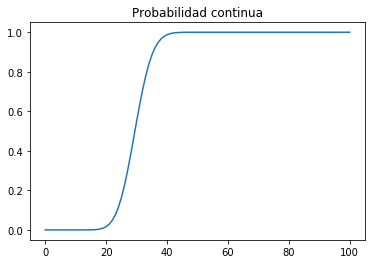

In [127]:
#Probabilidad acumulada
N = 100
x = list(range(0,N+1,1))
y = list([])

for i in x:
    y.append(binom.cdf(i, p = 0.3, n= N))
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Probabilidad continua')

In [128]:
mean, var ,skew, kurt = norm.stats(moments = 'mvsk')
mean, var ,skew, kurt

(array(0.), array(1.), array(0.), array(0.))

# Sesion 11
# Funciones de distribución discreta code

Distribuccion de Bernoulli, Binomial, Geometrica, Binomial negativa and poison

#### Bernoli

In [129]:
#Parametros poblacionales
P = 0.3
data = bernoulli.rvs(p, size = 100)
data

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [130]:
mean, var, skew, kurt = bernoulli.stats(p, moments = 'mvsk')
mean, var, skew, kurt

(array(0.3), array(0.21), array(0.87287156), array(-1.23809524))

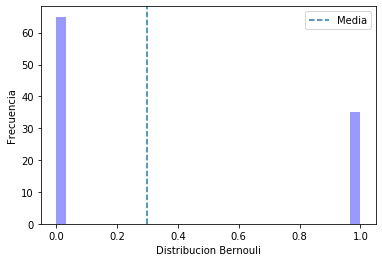

In [131]:
ax = sns.distplot(data, bins = 30, kde = False, color = 'b') 
ax.set(xlabel = 'Distribucion Bernouli', ylabel = 'Frecuencia')
ax.axvline(x=mean, linestyle = '--', label = 'Media')
ax.legend()

#### Binomial

In [132]:
p = 0.3
n = 10
data = binom.rvs(p = p, n = n, size = 100)
len(data)

100

In [133]:
mean, var, skew, kurt = binom.stats(p = p, n = n, moments = 'mvsk')
mean, var, skew, kurt

(array(3.), array(2.1), array(0.27602622), array(-0.12380952))

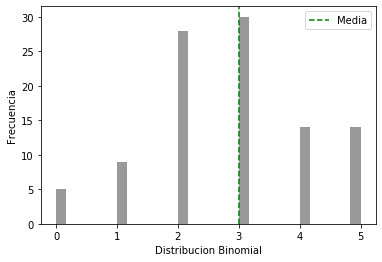

In [134]:
ax = sns.distplot(data, bins = 30, kde = False, color = 'k') 
ax.set(xlabel = 'Distribucion Binomial', ylabel = 'Frecuencia')
ax.axvline(x=mean, linestyle = '--', label = 'Media', color = 'g')
ax.legend()

#### Distribuccion geometrica

In [135]:
p = 0.3
n = 10
data = nbinom.rvs(p = p, n = n, size = 100)

In [136]:
mean, var, skew, kurt = nbinom.stats(p = p, n = n, moments = 'mvsk')
mean, var, skew, kurt

(array(23.33333333), array(77.77777778), array(0.6425396), array(0.61285714))

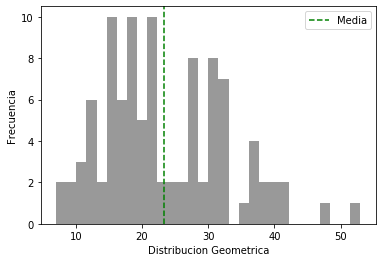

In [137]:
ax = sns.distplot(data, bins = 30, kde = False, color = 'k') 
ax.set(xlabel = 'Distribucion Geometrica', ylabel = 'Frecuencia')
ax.axvline(x=mean, linestyle = '--', label = 'Media', color = 'g')
ax.legend()

#### Poison

In [138]:
lambda_p = 100
data = poisson.rvs(mu = lambda_p, size = 100)

In [139]:
mean, var, skew, kurt = poisson.stats(mu = lambda_p, moments = 'mvsk')
mean, var, skew, kurt

(array(100.), array(100.), array(0.1), array(0.01))

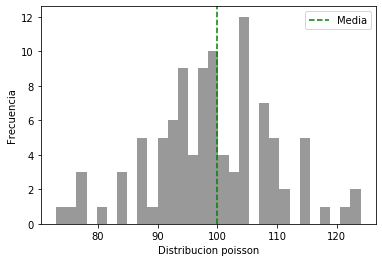

In [140]:
ax = sns.distplot(data, bins = 30, kde = False, color = 'k') 
ax.set(xlabel = 'Distribucion poisson', ylabel = 'Frecuencia')
ax.axvline(x=mean, linestyle = '--', label = 'Media', color = 'g')
ax.legend()

# Sesion 12
# Funciones de distribución continua code

#### Distribucion Exponencial

In [141]:
data = expon.rvs(size = 1000000)
data

array([0.63445719, 0.51806999, 1.57754174, ..., 0.39802048, 0.35789176,
       1.97425472])

In [142]:
mean, var, skew, kurt = expon.stats(moments = 'mvsk')
mean, var, skew, kurt

(array(1.), array(1.), array(2.), array(6.))

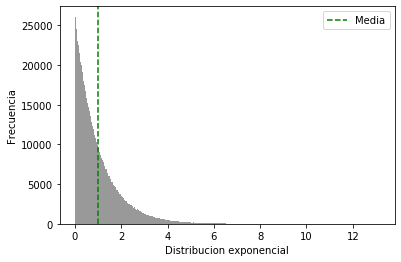

In [143]:
ax = sns.distplot(data, bins = 500, kde = False, color = 'k') 
ax.set(xlabel = 'Distribucion exponencial', ylabel = 'Frecuencia')
ax.axvline(x=mean, linestyle = '--', label = 'Media', color = 'g')
ax.legend()

#### Distribucion Normal

In [144]:
mean = 0
var = 1
data = norm.rvs(size = 100000000)
data

array([ 1.26475703, -0.42054146,  1.58232665, ..., -2.31845513,
        0.8704413 , -0.37807061])

In [145]:
mean, var, skew, kurt = norm.stats(moments = 'mvsk')
mean, var, skew, kurt

(array(0.), array(1.), array(0.), array(0.))

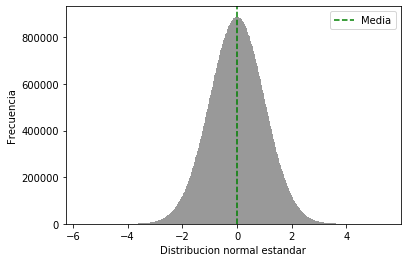

In [146]:
ax = sns.distplot(data, bins = 500, kde = False, color = 'k') 
ax.set(xlabel = 'Distribucion normal estandar', ylabel = 'Frecuencia')
ax.axvline(x=mean, linestyle = '--', label = 'Media', color = 'g')
ax.legend()

#### Distribucion Uniforme

In [147]:
data = uniform.rvs(size = 100000000)

In [148]:
mean, var, skew, kurt = uniform.stats(moments = 'mvsk')
mean, var, skew, kurt

(array(0.5), array(0.08333333), array(0.), array(-1.2))

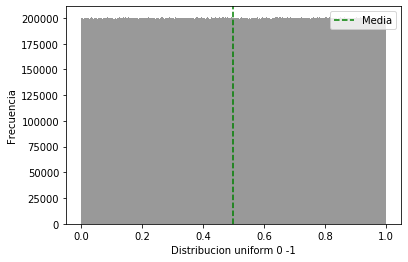

In [184]:
ax = sns.distplot(data, bins = 500, kde = False, color = 'k') 
ax.set(xlabel = 'Distribucion uniform 0 -1', ylabel = 'Frecuencia')
ax.axvline(x=mean, linestyle = '--', label = 'Media', color = 'g')
ax.legend()

# Sesion 13

#### Estandarizacion, covarianza y correlacion

In [185]:
iris_data = pd.read_csv('iris-data.csv', index_col = 0)
iris_data.head(n = 3)

,lar.sepalo,anc.sepalo,lar.petalo,anc.petalo,tipo_flor
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0


In [186]:
iris_data.tipo_flor.value_counts()

2.0    50
1.0    50
0.0    50
Name: tipo_flor, dtype: int64

In [187]:
y = iris_data['lar.petalo']
y.describe()

count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: lar.petalo, dtype: float64

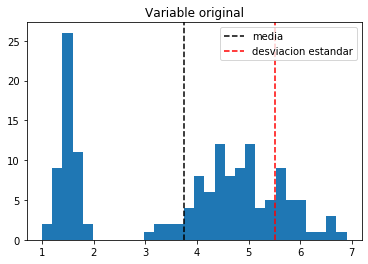

In [188]:
fig, ax = plt.subplots()
ax.set_title('Variable original')
ax.hist(y, bins = 30)
ax.axvline(x = np.mean(y), c = 'k', label = 'media', linestyle = '--')
ax.axvline(x = np.mean(y) + np.std(y), c = 'r', label = 'desviacion estandar', linestyle = '--')
ax.legend()

#### Estandarizacion

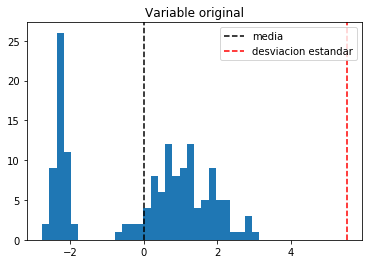

In [189]:
fig, ax = plt.subplots()
ax.set_title('Variable original')
ax.hist(y - np.mean(y), bins = 30)
ax.axvline(x = np.mean(y - np.mean(y)), c = 'k', label = 'media', linestyle = '--')
ax.axvline(x = np.mean(y) + np.std(y), c = 'r', label = 'desviacion estandar', linestyle = '--')
ax.legend()

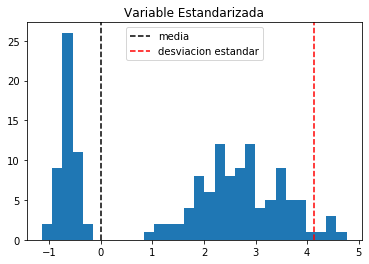

In [190]:
fig, ax = plt.subplots()
ax.set_title('Variable Estandarizada')
ax.hist((y - np.mean(y)/np.std(y)), bins = 30)
ax.axvline(x = np.mean((y - np.mean(y))/np.std(y)), c = 'k', label = 'media', linestyle = '--')
ax.axvline(x = np.mean((np.mean(y) + np.std(y))/np.std(y)) + np.std((y - np.mean(y))/np.std(y)), c = 'r', label = 'desviacion estandar', linestyle = '--')
ax.legend()

#### Covarianza

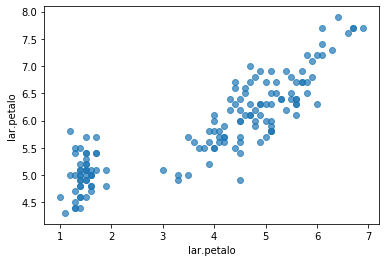

In [191]:
fig, ax = plt.subplots()
ax.scatter(iris_data['lar.petalo'], iris_data['lar.sepalo'], alpha = 0.7)
ax.set_xlabel('lar.petalo')
ax.set_ylabel('lar.petalo')
ax.autoscale()

In [192]:
np.cov(iris_data['lar.petalo'], iris_data['lar.sepalo'])

array([[3.11627785, 1.27431544],
       [1.27431544, 0.68569351]])

In [193]:
iris_data.corr(method = 'spearman')

,lar.sepalo,anc.sepalo,lar.petalo,anc.petalo,tipo_flor
lar.sepalo,1.000000,-0.166778,0.881898,0.834289,0.798078
anc.sepalo,-0.166778,1.000000,-0.309635,-0.289032,-0.440290
lar.petalo,0.881898,-0.309635,1.000000,0.937667,0.935431
anc.petalo,0.834289,-0.289032,0.937667,1.000000,0.938179
tipo_flor,0.798078,-0.440290,0.935431,0.938179,1.000000


In [194]:
corr = iris_data.corr(method = 'kendall')
corr

,lar.sepalo,anc.sepalo,lar.petalo,anc.petalo,tipo_flor
lar.sepalo,1.000000,-0.076997,0.718516,0.655309,0.670444
anc.sepalo,-0.076997,1.000000,-0.185994,-0.157126,-0.337614
lar.petalo,0.718516,-0.185994,1.000000,0.806891,0.822911
anc.petalo,0.655309,-0.157126,0.806891,1.000000,0.839687
tipo_flor,0.670444,-0.337614,0.822911,0.839687,1.000000


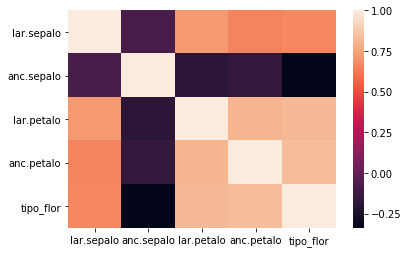

In [195]:
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns)

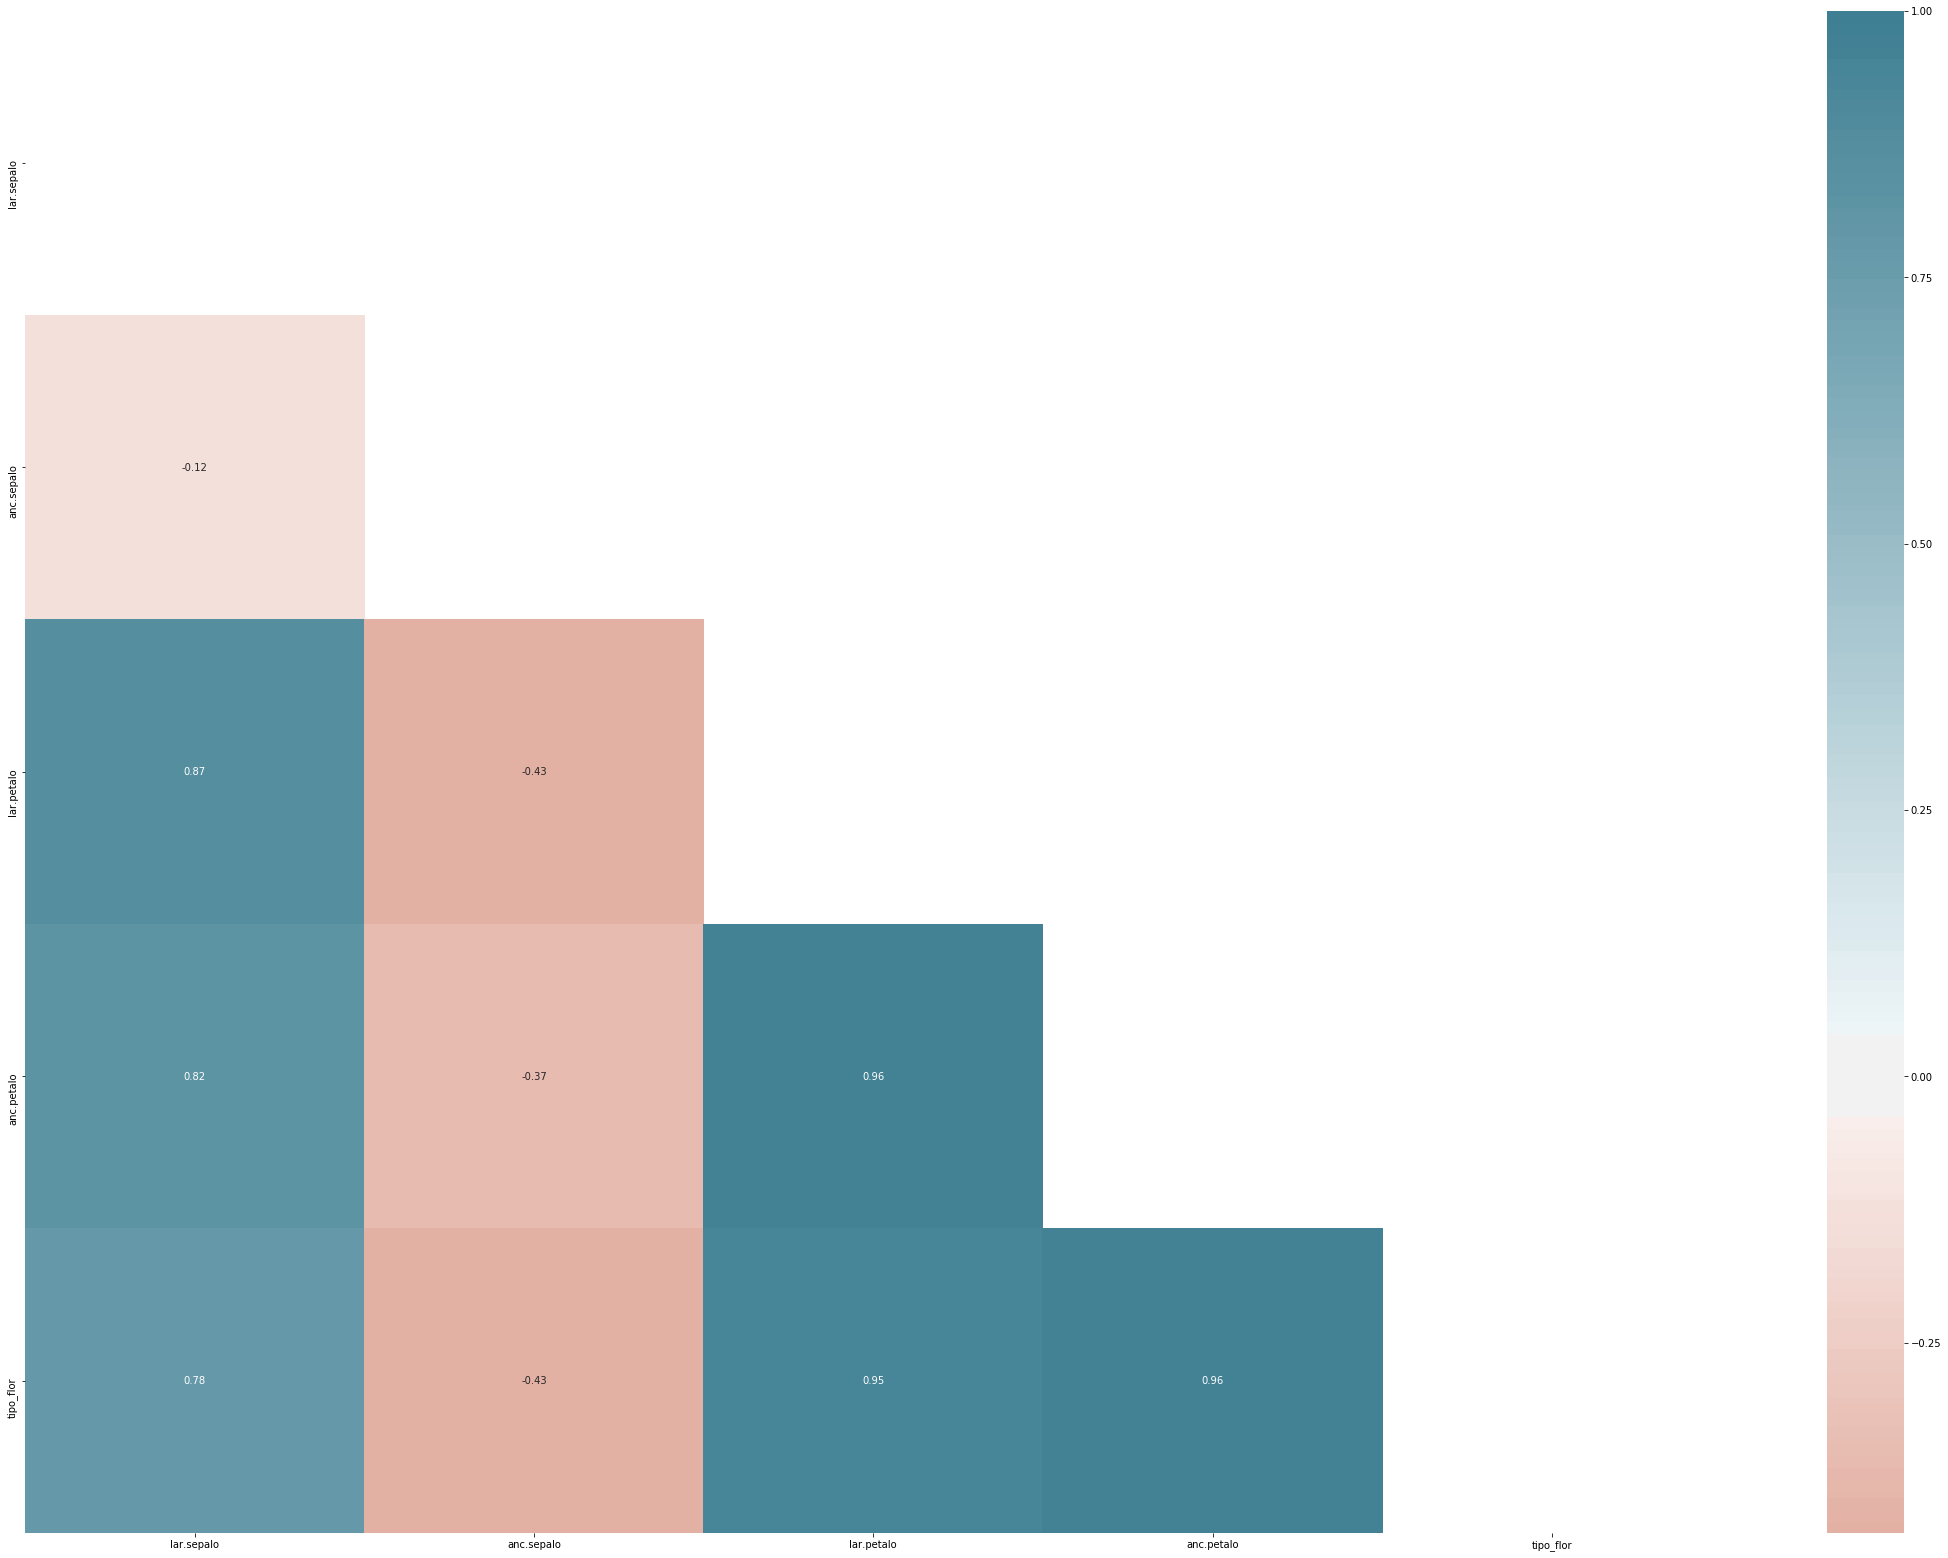

In [196]:
plt.subplots(figsize = (38,28))
mask = np.zeros_like(iris_data.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(iris_data.corr(), cmap = sns.diverging_palette(20,220,n = 200), mask = mask, annot = True, center = 0)

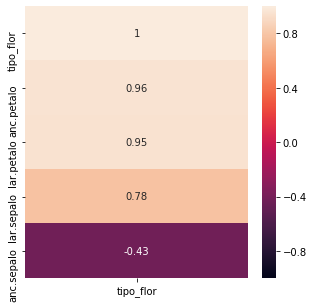

In [197]:
plt.figure(figsize = (5,5))
sns.heatmap(iris_data.corr()[['tipo_flor']].sort_values(by=['tipo_flor'],ascending = False).head(50), vmin = -1, annot = True)

# Sesion 14

# Estimadores a través de datos

In [198]:
#Como generar inferencias de una poblacion a partir de una muestra
#Muestra
x1 = 3
#hipotesis
mu1 = 4
mu2 = 7
sigma = 1
p_muestra = norm.pdf(x1,mu1,sigma)
p_muestra

0.24197072451914337

In [199]:
p_muestra = norm.pdf(x1,mu2,sigma)
p_muestra

0.00013383022576488537

In [200]:
# Probabilidad conjunta de que estos casos sucedan
x1 = 3
x2 = 10
#hipotesis
mu1 = 4
mu2 = 7
sigma = 1
#Multiplicacion de la ocurrencia de estos eventos
p_muestra = norm.pdf(x1,mu2,sigma) * norm.pdf(x2,mu2,sigma)
p_muestra

5.931152735254122e-07

In [201]:
p_muestra = norm.pdf(x1,mu1,sigma) * norm.pdf(x2,mu1,sigma)
p_muestra

1.4701857752651781e-09

In [202]:
muestra_10 = norm.rvs(5, sigma, size = 10)

In [203]:
dataA = norm.rvs(mu1, sigma, size = 100000)
dataB = norm.rvs(mu2, sigma, size = 100000)
dataA, dataB

(array([3.06339335, 3.51213041, 6.71901462, ..., 3.043028  , 3.87412833,
        4.71582446]),
 array([6.21832604, 5.9643397 , 7.73037413, ..., 7.8992757 , 6.75569625,
        6.81439746]))

In [204]:
muestra_10
y = []
for i in range(10):
    y.append(3000)

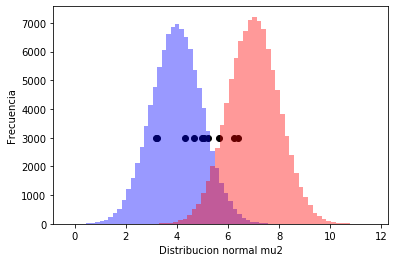

In [205]:
ax = sns.distplot(dataA, bins = 50, color = 'b', kde=False)
ax.set(xlabel = 'Distribucion normal mu1', ylabel = 'Frecuencia')

ax = sns.distplot(dataB, bins = 50, color = 'r', kde=False)
ax.set(xlabel = 'Distribucion normal mu2', ylabel = 'Frecuencia')

ax.scatter(muestra_10, y, c ='K')


# Sesion 15

# Estimadores de máxima verosimilitud

# Distribuciones muestrales

### Distribucion T

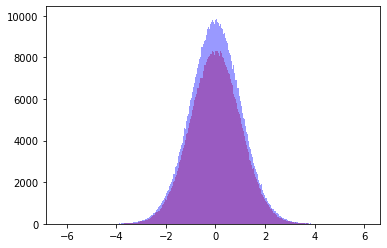

In [206]:
dataA = t.rvs(100, size = 1000000)
dataB = t.rvs(50, size = 1000000)
ax = sns.distplot(dataA, bins = 500, kde = False, color = 'red')
ax = sns.distplot(dataB, bins = 500, kde = False, color = 'blue')

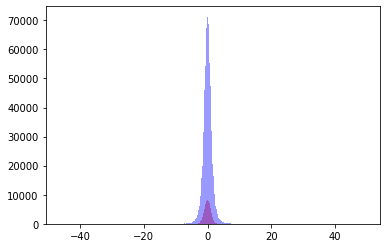

In [207]:
dataA = t.rvs(100, size = 1000000)
dataB = t.rvs(4, size = 1000000)
ax = sns.distplot(dataA, bins = 500, kde = False, color = 'red')
ax = sns.distplot(dataB, bins = 500, kde = False, color = 'blue')

### Distribucion chi-2

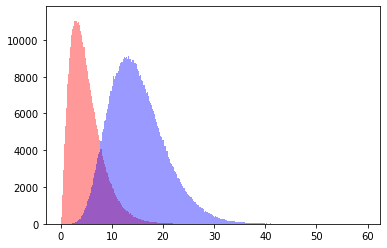

In [208]:
dataA = chi2.rvs(5, size = 1000000)
dataB = chi2.rvs(15, size = 1000000)
ax = sns.distplot(dataA, bins = 500, kde = False, color = 'red')
ax = sns.distplot(dataB, bins = 500, kde = False, color = 'blue')

### Distribucion F

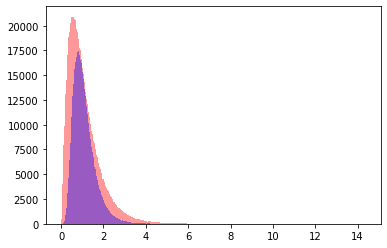

In [209]:
dataC = f.rvs(5, 25, size = 1000000)
dataD = f.rvs(15, 25, size = 1000000)
ax = sns.distplot(dataC, bins = 500, kde = False, color = 'red')
ax = sns.distplot(dataD, bins = 500, kde = False, color = 'blue')

###### Calculos de probabildad

In [210]:
f.pdf(4,15,25)

0.0019800859524222187

In [211]:
f.cdf(4,15,25)

0.9988900520089906

In [212]:
f.ppf(0.9988900520089906, 15, 25)

4.000000000000022

In [213]:
f.ppf(0.5, 15, 25)

0.982011155699839

# Sesion 16

# Teorema del límite central

In [214]:
poblacion = pd.DataFrame()
poblacion['numbers'] = expon.rvs(40,size = 100000)
poblacion.describe()

,numbers
count,100000.000000
mean,41.002204
std,1.003838
min,40.000017
25%,40.289868
50%,40.693362
75%,41.386411
max,52.752827


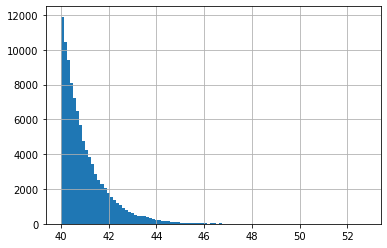

In [215]:
poblacion['numbers'].hist(bins = 100)

In [216]:
muestra_promedio = []
tamanio = 50
for i in range(0,tamanio):
    muestra_promedio.append(poblacion.sample(n=100).mean().values[0])

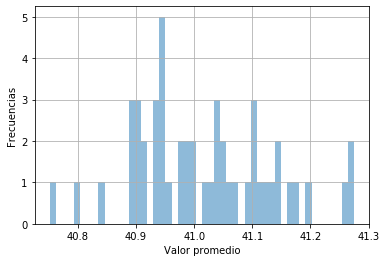

In [217]:
fig, ax = plt.subplots()
ax.hist(muestra_promedio, bins = 50, alpha = 0.5)
ax.set_xlabel('Valor promedio')
ax.set_ylabel('Frecuencias')
ax.grid()

# Sesion 17

# Pruebas de hipótesis

In [2]:
muestra = [42, 35, 29, 45, 41, 57, 54, 47, 48, 56, 47, 35, 52, 31, 52, 55, 57, 58, 26, 29, 32, 37, 32, 34, 48, 20, 48, 51, 27, 24, 39, 40, 31, 34, 23, 24, 41, 58, 44, 48, 31, 23, 27, 55, 43, 47, 30, 57, 38, 51]
len(muestra)

50

In [3]:
# Hipotesis
media, var, skew, kurt = expon.stats(scale = 30, moments = 'mvsk')

In [4]:
# Paso 1: Parametro lambda
# Paso 2: HP
mu = 30
mu > 30
# Paso 3: estimador
# Estimador
# Paso 4:Distribucion
promedio = np.mean(muestra)
promedio

40.66

In [5]:
# Paso 5
z = (promedio - mu) /np.sqrt(var/50)
z

2.5125860958161983

In [6]:
# Paso 6
alpha = 0.05
# Criterios de rechazo
data_norm = norm.rvs(size = 1000000)

Text(0.5, 1.0, 'Distribucion normal')

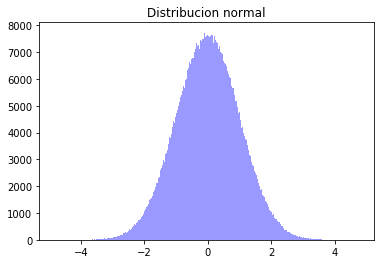

In [7]:
ax = sns.distplot(data_norm, bins = 500, kde = False, color = 'b')
ax.set_title('Distribucion normal')

In [9]:
valor_critico = norm.ppf(1-alpha, loc = 0, scale = 1)
valor_critico

1.6448536269514722

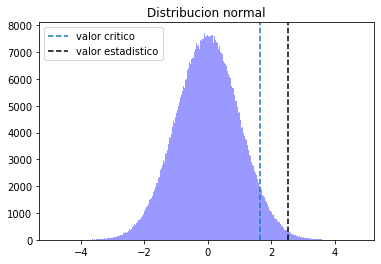

In [10]:
ax = sns.distplot(data_norm, bins = 500, kde = False, color = 'b')
ax.set_title('Distribucion normal')
ax.axvline(x = valor_critico, linestyle = '--', label = 'valor critico')
ax.axvline(x = z, linestyle = '--', label = 'valor estadistico', color = 'k')
ax.legend()

# Sesion 18

# Errores estadísticos Tipo 1 y Tipo 2

In [11]:
mu1 = 37
mu2 = 42
promedio
desv = 2
z_1 = (promedio - mu1)/desv
z_2 = (promedio - mu2)/desv

In [12]:
data1 = norm.rvs(loc = mu1, scale= desv, size = 1000000)
data2 = norm.rvs(loc = mu2, scale= desv, size = 1000000)

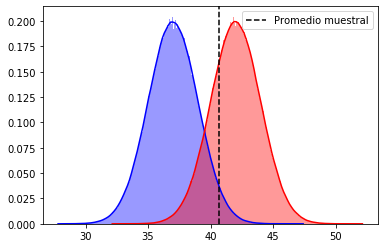

In [13]:
ax = sns.distplot(data1, bins = 500, kde = True, color = 'blue')
ax = sns.distplot(data2, bins = 500, kde = True, color = 'r')
ax.axvline(x=promedio,c='k', linestyle = '--', label = 'Promedio muestral')
ax.legend()

In [15]:
# Eeror tipo I : p rechazar cuando esta es verdadera
p_prom_mu1 = norm.cdf(z_1)
1-p_prom_mu1

0.03362496941962845

In [17]:
# Error 2:probabilidad de no rechazar h0 cuando esta es falsa
p_prom_mu2 = norm.cdf(z_2)
p_prom_mu2

0.2514288950953095

# Sesion 19
# Intervalo de confianza

In [18]:
muestra = [4046, 2578, 3796, 3412, 3315, 3228, 3666, 3877, 3154, 4062, 4365, 3776, 3761, 2587, 2911, 3184, 3810, 4459, 3385, 3899, 3602, 2701, 2821, 2790, 2557, 2540, 4119, 2712, 2743, 2713, 4466, 3937, 3871, 4427, 3177, 2556, 2903, 3522, 4155, 4010, 4453, 3080, 3008, 3865, 3356, 2799, 3308, 2759, 4347, 2576, 4075, 3333, 2936, 3746, 3334, 3940, 4113, 4220, 3580, 3922]

In [22]:
alpha = 0.05

In [21]:
lim_inf = norm.ppf(alpha/1)
lim_sup = norm.ppf(1-(alpha/1))
lim_inf, lim_sup

(-1.2815515655446004, 1.2815515655446004)

In [23]:
promedio = np.mean(muestra)
desviacion = np.std(muestra)
promedio, desviacion

(3472.383333333333, 594.7313704989468)

#### Ajustando los intervalos

In [24]:
lim_inf = lim_inf*desviacion + promedio
lim_sup = lim_sup*desviacion + promedio
lim_inf, lim_sup

(2710.204414391922, 4234.562252274744)

# Sesion 20
# Regresión Lineal

In [50]:
data = 'compensacion-ejecutivos.sav'
df, meta = pr.read_sav(data)
df.columns

Index(['salario', 'noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')

In [51]:
y = df['salario']
x = df.drop(['salario','noasiat','postgrad'], axis =1)
x

,gpa,experien
0,3.36,15.0
1,2.35,9.0
2,3.33,10.0
3,3.37,2.0
4,3.87,4.0
5,3.93,13.0
6,2.27,12.0
7,3.04,14.0
8,3.26,8.0
9,2.73,5.0


In [52]:
reg_line = sm.OLS(y, sm.add_constant(x)).fit()

In [53]:
print(reg_line.summary())

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     211.0
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           7.37e-38
Time:                        18:52:23   Log-Likelihood:                -1135.4
No. Observations:                 110   AIC:                             2277.
Df Residuals:                     107   BIC:                             2285.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4968.0099   4325.267      1.149      0.2

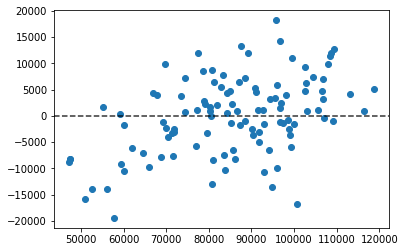

In [54]:
fig, ax = plt.subplots()
y_pred = reg_line.predict(sm.add_constant(x))
ax.scatter(y,y-y_pred)
plt.axhline(y=0,color = 'k',alpha=0.8, linestyle = '--')

Probar si hay multicolinealidad